# Section 1

## Libraries

In [77]:
pip install yfinance statsmodels

## Identify non-stationary

In [78]:
import yfinance as yf
from statsmodels.tsa.stattools import adfuller

# Define the cryptocurrencies and their Yahoo Finance tickers

cryptos = {
    'Cardano': 'ADA',
    'Polkadot': 'DOT',
    'Dogecoin': 'DOGE',
    'Avalanche': 'AVAX',
    'Uniswap': 'UNI'
}

# Define the time frames
time_frames = ['1d', '4h', '1h']

# Define the date range
start_date = '2023-11-01'
end_date = '2024-11-01'


# Resample each cryptocurrency's data to '4h' intervals


# Function to download data and perform ADF test
def download_and_test_stationarity(ticker, interval):
    # Download the data
    data = yf.download(ticker, start=start_date, end=end_date, interval=interval)

    # Check if the data is empty
    if data.empty:
        print(f"No data available for {ticker} at interval '{interval}'. Attempting to download 1-hour data and resample.")
        try:
            # Download 1-hour data
            data_1h = yf.download(
                ticker,
                start=start_date,
                end=end_date,
                interval='60m',
                group_by='ticker',
                auto_adjust=False,
                threads=True
            )

            if data_1h.empty:
                print(f"No 1-hour data available for {ticker} either. Cannot proceed.")
                return None

            data_1h = data_1h.xs(ticker, level='Ticker', axis=1)

            # Define resample rule based on desired interval
            resample_rule = ''
            if interval.endswith('h'):
                resample_rule = f"{int(interval[:-1])}H"
            elif interval.endswith('d'):
                resample_rule = 'D'
            elif interval.endswith('wk'):
                resample_rule = 'W'
            elif interval.endswith('mo'):
                resample_rule = 'M'
            else:
                print(f"Unsupported interval format: '{interval}'")
                return None

            # Resample the 1-hour data to the desired interval
            data = data_1h.resample(resample_rule).agg({
                'Open': 'first',
                'High': 'max',
                'Low': 'min',
                'Close': 'last',
                'Adj Close': 'last',
                'Volume': 'sum'
            })

            print(f"Data successfully resampled to '{interval}' interval.")
        except Exception as e:
            print(f"An error occurred while downloading or resampling data: {e}")
            return None
    # Perform the ADF test on the 'Close' prices
    adf_result = adfuller(data['Close'].dropna())


    # Extract the p-value
    p_value = adf_result[1]

    return p_value

# Store results
results = {}

# Iterate over each cryptocurrency and time frame
for name, ticker in cryptos.items():
    for interval in time_frames:
        p_value = download_and_test_stationarity(ticker, interval)
        results[(name, interval)] = p_value
        print(f'{name} ({interval}): ADF p-value = {p_value}')

# Identify non-stationary series
non_stationary_cryptos = [(name, interval) for (name, interval), p_value in results.items() if p_value is not None and p_value > 0.1]

if non_stationary_cryptos:
    print("\nNon-stationary cryptocurrencies (p-value > 0.1):")
    for name, interval in non_stationary_cryptos:
        print(f'{name} ({interval})')
else:
    print("All top cryptocurrencies are stationary. Consider analyzing lower-value cryptocurrencies.")

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-11-01 -> 2024-11-01)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (60m 2023-11-01 -> 2024-11-01)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (4h 2023-11-01 -> 2024-11-01) (Yahoo error = "Invalid input - interval=4h is not supported. Valid intervals: , 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]")')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADA']: YFPricesMissingError('$%ticker%: p

No data available for ADA at interval '1d'. Attempting to download 1-hour data and resample.
No 1-hour data available for ADA either. Cannot proceed.
Cardano (1d): ADF p-value = None
No data available for ADA at interval '4h'. Attempting to download 1-hour data and resample.
No 1-hour data available for ADA either. Cannot proceed.
Cardano (4h): ADF p-value = None
No data available for ADA at interval '1h'. Attempting to download 1-hour data and resample.
No 1-hour data available for ADA either. Cannot proceed.
Cardano (1h): ADF p-value = None
No data available for DOT at interval '1d'. Attempting to download 1-hour data and resample.
No 1-hour data available for DOT either. Cannot proceed.
Polkadot (1d): ADF p-value = None
No data available for DOT at interval '4h'. Attempting to download 1-hour data and resample.
No 1-hour data available for DOT either. Cannot proceed.
Polkadot (4h): ADF p-value = None


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DOT']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1h 2023-11-01 -> 2024-11-01)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DOT']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (60m 2023-11-01 -> 2024-11-01)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DOGE']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DOGE']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DOGE']: YFTzMissin

No data available for DOT at interval '1h'. Attempting to download 1-hour data and resample.
No 1-hour data available for DOT either. Cannot proceed.
Polkadot (1h): ADF p-value = None
No data available for DOGE at interval '1d'. Attempting to download 1-hour data and resample.
No 1-hour data available for DOGE either. Cannot proceed.
Dogecoin (1d): ADF p-value = None
No data available for DOGE at interval '4h'. Attempting to download 1-hour data and resample.
No 1-hour data available for DOGE either. Cannot proceed.
Dogecoin (4h): ADF p-value = None
No data available for DOGE at interval '1h'. Attempting to download 1-hour data and resample.
No 1-hour data available for DOGE either. Cannot proceed.
Dogecoin (1h): ADF p-value = None
No data available for AVAX at interval '1d'. Attempting to download 1-hour data and resample.
No 1-hour data available for AVAX either. Cannot proceed.
Avalanche (1d): ADF p-value = None


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVAX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVAX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVAX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVAX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['UNI']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-11

No data available for AVAX at interval '4h'. Attempting to download 1-hour data and resample.
No 1-hour data available for AVAX either. Cannot proceed.
Avalanche (4h): ADF p-value = None
No data available for AVAX at interval '1h'. Attempting to download 1-hour data and resample.
No 1-hour data available for AVAX either. Cannot proceed.
Avalanche (1h): ADF p-value = None
No data available for UNI at interval '1d'. Attempting to download 1-hour data and resample.
No 1-hour data available for UNI either. Cannot proceed.
Uniswap (1d): ADF p-value = None
No data available for UNI at interval '4h'. Attempting to download 1-hour data and resample.
No 1-hour data available for UNI either. Cannot proceed.
Uniswap (4h): ADF p-value = None
No data available for UNI at interval '1h'. Attempting to download 1-hour data and resample.
No 1-hour data available for UNI either. Cannot proceed.
Uniswap (1h): ADF p-value = None
All top cryptocurrencies are stationary. Consider analyzing lower-value crypt

## Analysis of non-stationary

Trend Analysis: Look for long-term upward or downward trends in the data. This can be caused by factors such as increasing adoption, technological advancements, or macroeconomic conditions.

Seasonality: Identify any repeating patterns or cycles that occur at regular intervals, such as daily, weekly, or monthly. These can be influenced by trading behaviors or market cycles.

Volatility: Examine periods of high volatility, which can be driven by news events, regulatory changes, or market sentiment.

External Events: Consider significant events or news that may have impacted the cryptocurrency’s price, such as partnerships, hacks, or legal issues.

Market Sentiment: Analyze sentiment data from social media or news sources, as shifts in sentiment can lead to non-stationary behavior.

To perform this analysis, you can visualize the time series data, decompose it into trend and seasonal components, and overlay external factors or events. Here’s how you can start with trend and seasonality analysis using Python:

In [79]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Define the cryptocurrencies and their Yahoo Finance tickers

# Define the time frame and date range
interval = '1d'
start_date = '2023-11-01'
end_date = '2024-11-01'

# Loop through each cryptocurrency
for name, ticker in cryptos.items():
    # Download the data
    data = yf.download(ticker, start=start_date, end=end_date, interval=interval)

    # Check if the data is empty
    if data.empty:
        print(f"No data available for {ticker}.")
        continue

    # Perform seasonal decomposition
    result = seasonal_decompose(data['Close'].dropna(), model='additive', period=30)  # Adjust period as needed

    # Plot the decomposed components
    fig = result.plot()
    fig.suptitle(f'{name} ({ticker}) Decomposition', fontsize=16)
    plt.show()

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-11-01 -> 2024-11-01)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DOT']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-11-01 -> 2024-11-01)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DOGE']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVAX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['UNI']: YFPricesMiss

No data available for ADA.
No data available for DOT.
No data available for DOGE.
No data available for AVAX.
No data available for UNI.


## ACF, PACF

In [80]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for each non-stationary cryptocurrency
for name, ticker in cryptos.items():
    # Download the data
    data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

    if data.empty:
        print(f"No data available for {ticker} at interval {interval}.")
        continue

    series = data['Close'].dropna()

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plot_acf(series, ax=plt.gca(), lags=50)
    plt.title(f'{name} ({interval}) ACF')

    plt.subplot(1, 2, 2)
    plot_pacf(series, ax=plt.gca(), lags=50, method='ywm')
    plt.title(f'{name} ({interval}) PACF')

    plt.tight_layout()
    plt.show()


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-11-01 -> 2024-11-01)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DOT']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-11-01 -> 2024-11-01)')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DOGE']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AVAX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


No data available for ADA at interval 1d.
No data available for DOT at interval 1d.
No data available for DOGE at interval 1d.


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['UNI']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-11-01 -> 2024-11-01)')


No data available for AVAX at interval 1d.
No data available for UNI at interval 1d.


Identify
p
 for AR Model:

Look at the PACF Plot: Find the lag where the PACF plot cuts off (drops below the significance threshold).
Select
p
: The lag before the cut-off is the suggested value for
p
.
Identify
q
 for MA Model:

Look at the ACF Plot: Find the lag where the ACF plot cuts off.
Select
q
: The lag before the cut-off is the suggested value for
q
.
Identify
p
 and
q
 for ARMA Model:

Combine Information from ACF and PACF:
Use the PACF plot to suggest
p
.
Use the ACF plot to suggest
q
.
Example Steps:
Examine PACF for AR(p):

If PACF shows a sharp drop after lag 2, consider
p
=
2
.
Examine ACF for MA(q):

If ACF shows a sharp drop after lag 1, consider
q
=
1
.
For ARMA(p, q):

Combine the identified
p
 and
q
 values from above, e.g., ARMA(2,1).
Visual Guidelines:
Cut-Off vs. Decay:
Cut-Off: Indicates the order of the model (AR or MA).
Decay: Suggests non-stationarity or the need for differencing.
Example Interpretation:
AR(p):

PACF: Cuts off after lag 2.
ACF: Decays gradually.
Model Suggestion: AR(2).
MA(q):

ACF: Cuts off after lag 1.
PACF: Decays gradually.
Model Suggestion: MA(1).
ARMA(p, q):

PACF: Cuts off after lag 2.
ACF: Cuts off after lag 1.
Model Suggestion: ARMA(2,1).
Apply these guidelines to each cryptocurrency’s ACF and PACF plots to determine the appropriate
p
 and
q
 values for your AR, MA, and ARMA models.





- **Bitcoin:**
  - **MA (q):** ACF cuts off at lag 1. Choose \( q = 1 \).
  - **AR (p):** PACF cuts off at lag 1. Choose \( p = 1 \).
  - **ARMA (p, q):** Use both \( p = 1 \) and \( q = 1 \) based on ACF and PACF patterns.

- **Ethereum:**
  - **MA (q):** Use ACF. Look for the point where it cuts off. Here, it's not clear, suggesting a higher q.
  - **AR (p):** Use PACF. Look for the point where it cuts off. Here, it cuts off after lag 1, suggesting p = 1.
  - **ARMA:** Combine insights from both ACF and PACF.

- **Binance Coin:**
  - **MA (q):** ACF tails off, no clear cutoff.
  - **AR (p):** PACF cuts off at lag 1. Choose \( p = 1 \).
  - **ARMA (p, q):** Consider \( p = 1 \), \( q \) based on further analysis.

- **Cardano:**
  - **MA (q):** ACF tails off, so choose a higher \( q \).
  - **AR (p):** PACF cuts off after lag 1, so choose \( p = 1 \).
  - **ARMA:** Combine insights; likely \( p = 1 \), higher \( q \).
  
- **Crypto:** Shiba Inu
  - **MA (q):** ACF tails off, no clear cutoff.
  - **AR (p):** PACF cuts off after lag 1, so choose \( p = 1 \).
  - **ARMA:** Combine insights; likely \( p = 1 \), higher \( q \).

The above ACF plots indicate non-stationary serieses, as the autocorrelations decrease slowly rather than cutting off quickly.




## Train and Test

In [81]:
import yfinance as yf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import pandas as pd


# Define model parameters for each cryptocurrency
model_params = {
    'Bitcoin': {'p': 1, 'q': 1},
    'Ethereum': {'p': 1, 'q': 1},
    'Binance Coin': {'p': 1, 'q': 1},
    'Cardano': {'p': 1, 'q': 1},
    'Shiba Inu': {'p': 1, 'q': 1}
}

# Function to split data into training and testing sets
def train_test_split(series, train_ratio=11/12):
    split_point = int(len(series) * train_ratio)
    return series[:split_point], series[split_point:]

# Initialize a list to store evaluation metrics
evaluation_list = []

# Iterate over each cryptocurrency
for name, ticker in cryptos.items():
    params = model_params.get(name, None)
    if not params:
        continue
    p = params['p']
    q = params['q']

    # Download the data
    data = yf.download(ticker, start=start_date, end=end_date, interval='1d')
    if data.empty:
        print(f"No data available for {ticker}.")
        continue
    series = data['Close'].dropna()

    # Split into train and test
    train, test = train_test_split(series)

    # AR Model
    try:
        ar_model = AutoReg(train, lags=p).fit()
        ar_pred = ar_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)
        ar_mse = mean_squared_error(test, ar_pred)
        ar_mape = mean_absolute_percentage_error(test, ar_pred)
        evaluation_list.append({
            'Crypto': name,
            'Model': 'AR',
            'MSE': ar_mse,
            'MAPE': ar_mape
        })
    except Exception as e:
        print(f"AR model failed for {name}: {e}")

    # MA Model
    try:
        ma_model = ARIMA(train, order=(0, 0, q)).fit()
        ma_pred = ma_model.predict(start=test.index[0], end=test.index[-1])
        ma_mse = mean_squared_error(test, ma_pred)
        ma_mape = mean_absolute_percentage_error(test, ma_pred)
        evaluation_list.append({
            'Crypto': name,
            'Model': 'MA',
            'MSE': ma_mse,
            'MAPE': ma_mape
        })
    except Exception as e:
        print(f"MA model failed for {name}: {e}")

    # ARMA Model
    try:
        arma_model = ARIMA(train, order=(p, 0, q)).fit()
        arma_pred = arma_model.predict(start=test.index[0], end=test.index[-1])
        arma_mse = mean_squared_error(test, arma_pred)
        arma_mape = mean_absolute_percentage_error(test, arma_pred)
        evaluation_list.append({
            'Crypto': name,
            'Model': 'ARMA',
            'MSE': arma_mse,
            'MAPE': arma_mape
        })
    except Exception as e:
        print(f"ARMA model failed for {name}: {e}")

# Convert the list of evaluations to a DataFrame
evaluation_df = pd.DataFrame(evaluation_list)

# Display evaluation metrics
print(evaluation_df)

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-11-01 -> 2024-11-01)')


No data available for ADA.
Empty DataFrame
Columns: []
Index: []


## Transform to stationary

### Explanation of the Code


1. **Transformation Methods to Achieve Stationarity:**
   - **Method 1: Differencing**
     - **Purpose:** Removes trends in the data which can cause non-stationarity.
     - **Process:** The `diff()` method is applied to the series to compute the difference between consecutive observations.
     - **Validation:** ADF test is performed on the differenced series to check for stationarity.
   
   - **Method 2: Decomposition**
     - **Purpose:** Separates the time series into trend, seasonal, and residual components.
     - **Process:** `seasonal_decompose` is used with an additive model. The residual component is assumed to be stationary if trend and seasonality are removed.
     - **Validation:** ADF test is performed on the residuals to confirm stationarity.

2. **Applying Transformations:**
   - For each non-stationary cryptocurrency:
     - **Download Data:** Using `yfinance`.
     - **Plot Original Series:** Visual inspection of trends.
     - **ADF Test on Original Series:** Confirm non-stationarity.
     - **Apply Differencing:** Visual and statistical validation.
     - **If Still Non-Stationary:** Apply decomposition and extract residuals.
     - **Store Transformed Series:** Either the differenced series or residuals are stored for further modeling.

3. **Summary of Transformation Methods:**
   - After processing all non-stationary series, a summary is printed indicating which transformation was applied to achieve stationarity.

### Methods Used to Achieve Stationarity

1. **Differencing:**
   - **What It Does:** Subtracts the previous observation from the current observation.
   - **Why Use It:** Effective in removing trends and making the mean of the series constant over time.
   - **When to Use:** When the time series shows a clear trend.

2. **Decomposition:**
   - **What It Does:** Splits the time series into trend, seasonal, and residual (noise) components.
   - **Why Use It:** By removing trend and seasonality, the residuals are more likely to be stationary.
   - **When to Use:** When the time series exhibits both trend and seasonal patterns.

### Removing Effects of Various Factors

- **Trend Removal:**
  - Achieved through differencing or decomposition.
  - Ensures that the model focuses on the stationary residuals rather than long-term movements.

- **Seasonality Removal:**
  - Handled via decomposition.
  - Seasonal effects can introduce periodic fluctuations that violate stationarity assumptions.

By applying these transformation methods, the time series data becomes suitable for AR, MA, and ARMA modeling, ensuring that the underlying assumptions of these models are met.

In [82]:

import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# Function to perform ADF test
def adf_test(series, title=''):
    result = adfuller(series)
    print(f'ADF Statistic for {title}: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value:.4f}')
    if result[1] > 0.1:
        print("Result: Non-Stationary\n")
    else:
        print("Result: Stationary\n")

# Initialize a dictionary to store transformed series
transformed_series = {}

# Iterate over each non-stationary cryptocurrency
for name, interval in non_stationary_cryptos:
    ticker = cryptos[name]
    print(f'Processing {name} with interval {interval}...\n')

    # Download the data
    data = yf.download(ticker, start=start_date, end=end_date, interval=interval)

    if data.empty:
        print(f"No data available for {ticker} at interval {interval}.\n")
        continue

    series = data['Close'].dropna()

    # Plot original series
    plt.figure(figsize=(12, 4))
    plt.plot(series, label='Original')
    plt.title(f'{name} ({interval}) - Original Time Series')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

    # Perform ADF test on original series
    adf_test(series, title=f'{name} ({interval}) Original')

    # Method 1: Differencing to remove trend
    diff_series = series.diff().dropna()

    # Plot differenced series
    plt.figure(figsize=(12, 4))
    plt.plot(diff_series, label='Differenced')
    plt.title(f'{name} ({interval}) - Differenced Time Series')
    plt.xlabel('Date')
    plt.ylabel('Differenced Close Price')
    plt.legend()
    plt.show()

    # Perform ADF test on differenced series
    adf_test(diff_series, title=f'{name} ({interval}) Differenced')

    # Check if differenced series is stationary
    if adf_test(diff_series, title=f'{name} ({interval}) Differenced') or adf_test(diff_series, title=''):
        transformed_series[(name, interval)] = diff_series
        print(f'Differencing applied to {name} ({interval}) to achieve stationarity.\n')
        continue  # Move to next series if stationary

    # Method 2: Removing trend and seasonality using decomposition
    decomposition = seasonal_decompose(series, model='additive', period=30)  # Adjust period as needed

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid.dropna()

    # Plot decomposition
    decomposition.plot()
    plt.suptitle(f'{name} ({interval}) - Decomposition', fontsize=16)
    plt.show()

    # Perform ADF test on residuals
    adf_test(residual, title=f'{name} ({interval}) Residuals')

    # Store residuals as stationary series
    transformed_series[(name, interval)] = residual
    print(f'Decomposition applied to {name} ({interval}) and residuals extracted for stationarity.\n')

# Summary of Transformation Methods Used
print("\nSummary of Transformation Methods:")
for (name, interval), series in transformed_series.items():
    print(f'- {name} ({interval}): ', end='')
    # Re-run ADF to confirm stationarity
    result = adfuller(series)
    if result[1] > 0.1:
        print('Still Non-Stationary')
    else:
        # Determine the method based on how we stored
        # If series was differenced
        original_data = yf.download(cryptos[name], start=start_date, end=end_date, interval=interval)['Close'].dropna()
        if len(series) == len(original_data) -1:
            print('Differenced to achieve stationarity')
        else:
            print('Decomposition and residuals extracted to achieve stationarity')



Summary of Transformation Methods:


## Test on transformed time serieses

In [83]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Define model parameters for each cryptocurrency
model_params = {
    'Bitcoin': {'p': 1, 'q': 1},
    'Ethereum': {'p': 1, 'q': 1},
    'Binance Coin': {'p': 1, 'q': 1},
    'Cardano': {'p': 1, 'q': 1},
    'Shiba Inu': {'p': 1, 'q': 1}
}

# Function to split data into training (11 months) and testing (1 month)
def train_test_split(series, train_months=11, test_months=1):
    if not isinstance(series.index, pd.DatetimeIndex):
        series = series.copy()
        series.index = pd.to_datetime(series.index)
    series = series.sort_index()
    split_date = series.index.max() - pd.DateOffset(months=test_months)
    train = series[series.index <= split_date]
    test = series[series.index > split_date]
    return train, test

# Initialize a list to store evaluation metrics
evaluation_list = []

# Iterate over each transformed time series
for (name, interval), series in transformed_series.items():
    if name not in model_params:
        print(f"\nModel parameters for {name} not defined. Skipping...\n")
        continue

    p = model_params[name]['p']
    q = model_params[name]['q']

    train, test = train_test_split(series)

    print(f"\n{name} ({interval}):")
    print(f"Training from {train.index[0].date()} to {train.index[-1].date()}")
    print(f"Testing from {test.index[0].date()} to {test.index[-1].date()}")

    # AR Model
    try:
        ar_model = AutoReg(train, lags=p).fit()
        ar_pred = ar_model.forecast(steps=len(test))
        ar_mse = mean_squared_error(test, ar_pred)
        ar_mape = mean_absolute_percentage_error(test, ar_pred)
        evaluation_list.append({'Crypto': name, 'Model': 'AR', 'MSE': ar_mse, 'MAPE': ar_mape})
        print(f"AR Model - MSE: {ar_mse:.4f}, MAPE: {ar_mape:.4f}")
    except Exception as e:
        print(f"AR Model failed for {name}: {e}")

    # MA Model
    try:
        ma_model = ARIMA(train, order=(0, 0, q)).fit()
        ma_pred = ma_model.forecast(steps=len(test))
        ma_mse = mean_squared_error(test, ma_pred)
        ma_mape = mean_absolute_percentage_error(test, ma_pred)
        evaluation_list.append({'Crypto': name, 'Model': 'MA', 'MSE': ma_mse, 'MAPE': ma_mape})
        print(f"MA Model - MSE: {ma_mse:.4f}, MAPE: {ma_mape:.4f}")
    except Exception as e:
        print(f"MA Model failed for {name}: {e}")

    # ARMA Model
    try:
        arma_model = ARIMA(train, order=(p, 0, q)).fit()
        arma_pred = arma_model.forecast(steps=len(test))
        arma_mse = mean_squared_error(test, arma_pred)
        arma_mape = mean_absolute_percentage_error(test, arma_pred)
        evaluation_list.append({'Crypto': name, 'Model': 'ARMA', 'MSE': arma_mse, 'MAPE': arma_mape})
        print(f"ARMA Model - MSE: {arma_mse:.4f}, MAPE: {arma_mape:.4f}")
    except Exception as e:
        print(f"ARMA Model failed for {name}: {e}")

# Convert the evaluation list to a DataFrame
evaluation_df = pd.DataFrame(evaluation_list)

# Display the evaluation metrics
print("\nEvaluation Metrics for AR, MA, and ARMA Models:")
print(evaluation_df)


Evaluation Metrics for AR, MA, and ARMA Models:
Empty DataFrame
Columns: []
Index: []


it’s advisable to use the forecast method instead of predict when dealing with time steps beyond the training data. The forecast method requires specifying the number of steps to predict ahead, eliminating the need to match specific dates.

# Section 2

## Top 10 Cryptos

In [84]:
import yfinance as yf
import pandas as pd

cryptos = {
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD',
    'Tether': 'USDT-USD',
    'Binance Coin': 'BNB-USD',
    'USD Coin': 'USDC-USD',
    'XRP': 'XRP-USD',
    'Cardano': 'ADA-USD',
    'Solana': 'SOL-USD',
    'Dogecoin': 'DOGE-USD',
    'Polygon': 'MATIC-USD'
}
# Define the date range
start_date = '2023-11-01'
end_date = '2024-11-01'
interval = '1d'  # Daily interval

# Download the data for all cryptocurrencies
data = yf.download(list(cryptos.values()), start=start_date, end=end_date, interval=interval)

# Organize data into a dictionary with cryptocurrency names as keys
crypto_data = {}
for name, ticker in cryptos.items():
    if ticker in data['Close'].columns:
        crypto_data[name] = data['Close'][ticker].dropna()
    else:
        print(f"No data found for {ticker}")

# Example: Display the first few rows of Bitcoin data
print(crypto_data['Bitcoin'].head())

[*********************100%***********************]  10 of 10 completed


Date
2023-11-01 00:00:00+00:00    35437.253906
2023-11-02 00:00:00+00:00    34938.242188
2023-11-03 00:00:00+00:00    34732.324219
2023-11-04 00:00:00+00:00    35082.195312
2023-11-05 00:00:00+00:00    35049.355469
Name: BTC-USD, dtype: float64


## Volatility and relationship to ARCH and GARCH models

         Crypto  Up Volatility  Down Volatility
0       Bitcoin       0.020165         0.016955
1      Ethereum       0.025207         0.020512
2        Tether       0.000259         0.000238
3  Binance Coin       0.023851         0.018876
4      USD Coin       0.000106         0.000093
5           XRP       0.025770         0.022189
6       Cardano       0.027024         0.023792
7        Solana       0.035488         0.025732
8      Dogecoin       0.037181         0.028003
9       Polygon       0.027232         0.026169


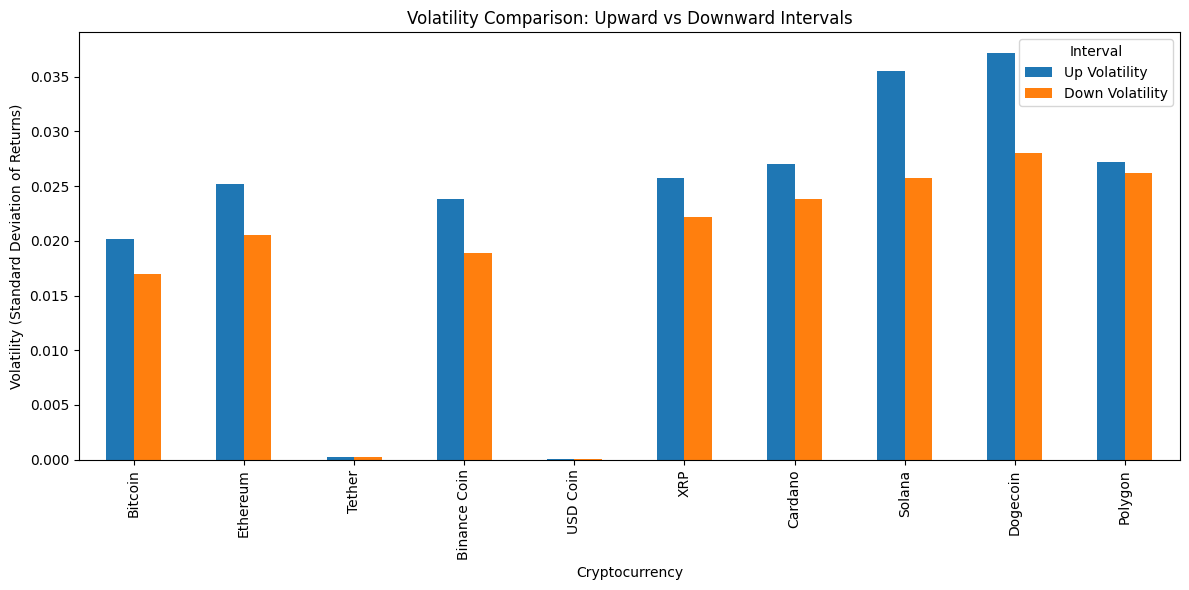

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a dictionary to store volatility results
volatility_results = {
    'Crypto': [],
    'Up Volatility': [],
    'Down Volatility': []
}

# Iterate over each cryptocurrency
for name, series in crypto_data.items():
    # Calculate daily returns
    returns = series.pct_change().dropna()

    # Classify days
    up_days = returns[returns > 0]
    down_days = returns[returns < 0]

    # Calculate volatility (standard deviation) for up and down days
    up_vol = up_days.std()
    down_vol = down_days.std()

    # Store the results
    volatility_results['Crypto'].append(name)
    volatility_results['Up Volatility'].append(up_vol)
    volatility_results['Down Volatility'].append(down_vol)

# Create a DataFrame from the results
volatility_df = pd.DataFrame(volatility_results)

# Display the volatility comparison
print(volatility_df)

# Plot the volatility comparison
volatility_df.set_index('Crypto')[['Up Volatility', 'Down Volatility']].plot(kind='bar', figsize=(12, 6))
plt.title('Volatility Comparison: Upward vs Downward Intervals')
plt.ylabel('Volatility (Standard Deviation of Returns)')
plt.xlabel('Cryptocurrency')
plt.legend(title='Interval')
plt.tight_layout()
plt.show()

### **ARCH and GARCH Models: A Brief Overview**

**ARCH (Autoregressive Conditional Heteroskedasticity) Model:**
The ARCH model, introduced by Robert Engle in 1982, is designed to model and forecast time-varying volatility in financial time series data. It captures the idea that the variance of the current error term (or return) is related to the squared errors of previous time periods. In other words, periods of high volatility tend to be followed by high volatility, and periods of low volatility tend to follow low volatility. The ARCH(q) model specifies that the current variance depends on the past *q* squared error terms.

**GARCH (Generalized ARCH) Model:**
Developed by Tim Bollerslev in 1986 as an extension of the ARCH model, the GARCH model incorporates both past squared errors and past variances to model current volatility. Specifically, the GARCH(p, q) model includes *p* lagged variance terms and *q* lagged squared error terms. This extension allows the GARCH model to capture the persistence in volatility more effectively than the original ARCH model, making it widely used in financial econometrics for modeling and forecasting volatility.

### **Relationship Between Observed Volatility Patterns and ARCH/GARCH Models**

In your analysis of the top ten cryptocurrencies, you've observed that the **upward intervals** (periods when prices are increasing) exhibit **higher volatility** compared to the **downward intervals** (periods when prices are decreasing). This empirical finding has significant implications for the application and interpretation of ARCH and GARCH models:

1. **Modeling Time-Varying Volatility:**
   - **ARCH and GARCH models** are specifically designed to capture **time-varying volatility** in financial time series. The observation that volatility is not constant but varies between upward and downward trends aligns well with the fundamental assumptions of these models.
   
2. **Volatility Clustering:**
   - The higher volatility during upward movements suggests the presence of **volatility clustering**, where high-volatility periods tend to be followed by more high volatility. Both ARCH and GARCH models excellently capture this phenomenon by allowing the conditional variance to depend on past errors and past variances.

3. **Asymmetry in Volatility (Leverage Effect):**
   - Traditionally, in equity markets, it's often observed that **negative returns** (price declines) lead to **higher volatility** than positive returns, a phenomenon known as the **leverage effect**. However, your observation indicates the opposite for cryptocurrencies, where **positive returns** (price increases) are associated with higher volatility.
   - While basic ARCH and GARCH models assume that volatility responds similarly to positive and negative shocks, this asymmetry in your data suggests that **asymmetric GARCH models** (such as GJR-GARCH or EGARCH) might be more appropriate. These models allow for different responses of volatility to positive and negative shocks, thereby better capturing the unique volatility dynamics observed in your cryptocurrency data.

4. **Implications for Forecasting and Risk Management:**
   - Understanding that upward movements are more volatile can influence **forecasting strategies** and **risk management practices**. For instance, during bullish market phases, risk measures (like Value at Risk) might need to account for higher expected volatility.
   - **ARCH/GARCH models** can provide more accurate volatility forecasts by incorporating these time-varying and asymmetric volatility patterns, leading to better-informed financial decisions.

5. **Model Specification and Parameter Estimation:**
   - Given the observed volatility pattern, it may be beneficial to **specify GARCH models** that can accommodate the higher volatility during upward movements. This could involve selecting appropriate lag orders (*p* and *q*) and considering the inclusion of additional variables or leverage terms that capture the asymmetric response of volatility to returns.

### **Conclusion**

Your analysis reveals a distinctive volatility pattern in cryptocurrency markets, where upward price movements are associated with higher volatility. This finding underscores the importance of utilizing **ARCH and GARCH models** to effectively model and forecast volatility in such time series data. Moreover, the observed asymmetry suggests that extending to **asymmetric GARCH models** may provide an even better fit, capturing the nuanced volatility dynamics inherent in the cryptocurrency landscape. Leveraging these models will enhance the accuracy of volatility forecasts and inform more robust risk management strategies.

# Section 3

In [86]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Define the cryptocurrencies and their Yahoo Finance tickers
cryptos = {
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD'
}

# Define the date range
start_date = '2023-11-01'
end_date = '2024-11-01'
interval = '1h'  # Four-hourly interval

# Download the data for Bitcoin and Ethereum
data = yf.download(list(cryptos.values()), start=start_date, end=end_date, interval=interval, group_by='ticker')

# Organize data into a dictionary with cryptocurrency names as keys
crypto_data = {}
for name, ticker in cryptos.items():
    if ticker in data:
        crypto_data[name] = data[ticker]['Close'].dropna()
    else:
        print(f"No data found for {ticker}")

def resample_to_4h(series):
    return series.resample('4H').agg({
        'Close': 'last'
    }).dropna()['Close']

# Resample each cryptocurrency's data to '4h' intervals
resampled_crypto_data = {}
for name, series in crypto_data.items():
    resampled_series = resample_to_4h(series.to_frame(name='Close'))
    resampled_crypto_data[name] = resampled_series
    print(f"{name} Resampled Data:")
    print(resampled_series.head())

# Split data into training, validation, and testing sets
train_data = {}
validation_data = {}
test_data = {}

for name, series in resampled_crypto_data.items():
    # Ensure the index is datetime
    series.index = pd.to_datetime(series.index)
    series = series.sort_index()

    # Define split dates
    total_days = (series.index[-1] - series.index[0]).days
    train_end = series.index[0] + pd.DateOffset(months=10)
    validation_end = train_end + pd.DateOffset(months=1)

    # Split the series
    train_data[name] = series[series.index < train_end]
    validation_data[name] = series[(series.index >= train_end) & (series.index < validation_end)]
    test_data[name] = series[series.index >= validation_end]

    print(f"{name} Data Split:")
    print(f"  Training: {train_data[name].index[0].date()} to {train_data[name].index[-1].date()}")
    print(f"  Validation: {validation_data[name].index[0].date()} to {validation_data[name].index[-1].date()}")
    print(f"  Testing: {test_data[name].index[0].date()} to {test_data[name].index[-1].date()}\n")

# Example: Display the first few rows of Bitcoin training data
print("Bitcoin Training Data:")
print(train_data['Bitcoin'].head())

[*********************100%***********************]  2 of 2 completed


Bitcoin Resampled Data:
Datetime
2023-11-01 00:00:00+00:00    34450.382812
2023-11-01 04:00:00+00:00    34466.558594
2023-11-01 08:00:00+00:00    34444.738281
2023-11-01 12:00:00+00:00    34293.300781
2023-11-01 16:00:00+00:00    34555.457031
Freq: 4h, Name: Close, dtype: float64
Ethereum Resampled Data:
Datetime
2023-11-01 00:00:00+00:00    1811.380615
2023-11-01 04:00:00+00:00    1805.155518
2023-11-01 08:00:00+00:00    1800.495728
2023-11-01 12:00:00+00:00    1793.007446
2023-11-01 16:00:00+00:00    1834.389526
Freq: 4h, Name: Close, dtype: float64
Bitcoin Data Split:
  Training: 2023-11-01 to 2024-08-31
  Validation: 2024-09-01 to 2024-09-30
  Testing: 2024-10-01 to 2024-10-31

Ethereum Data Split:
  Training: 2023-11-01 to 2024-08-31
  Validation: 2024-09-01 to 2024-09-30
  Testing: 2024-10-01 to 2024-10-31

Bitcoin Training Data:
Datetime
2023-11-01 00:00:00+00:00    34450.382812
2023-11-01 04:00:00+00:00    34466.558594
2023-11-01 08:00:00+00:00    34444.738281
2023-11-01 12:00:

## Plot

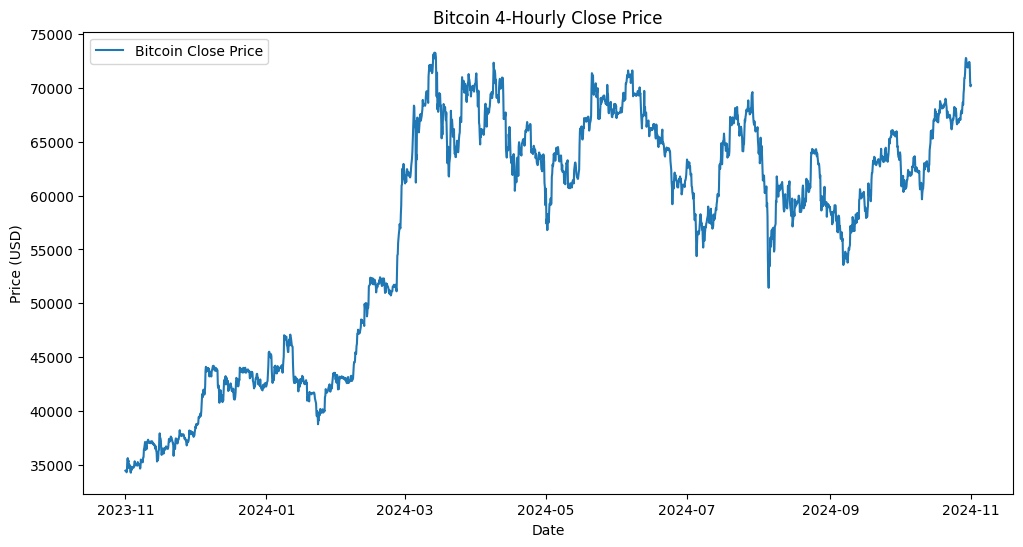

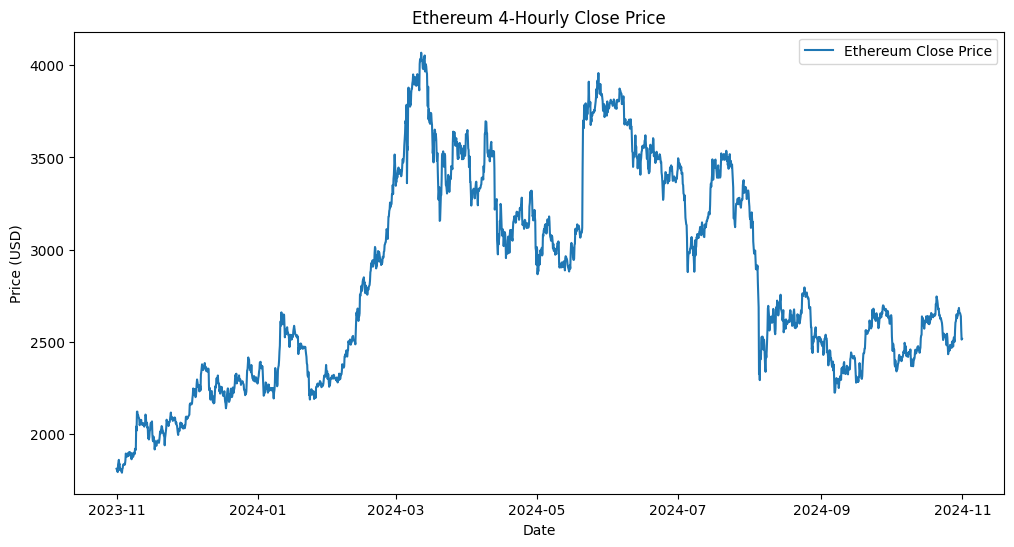

In [87]:
import matplotlib.pyplot as plt

for name, series in resampled_crypto_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(series, label=f'{name} Close Price')
    plt.title(f'{name} 4-Hourly Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

## Fit data

### Check stationarity

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pickle

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")

In [89]:
def adf_test(series, name='Series'):
    result = adfuller(series)
    print(f'Augmented Dickey-Fuller Test for {name}:')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value:.4f}')
    if result[1] <= 0.1:
        print("=> Stationary Series\n")
    else:
        print("=> Non-Stationary Series\n")

In [90]:
def plot_acf_pacf(series, title=''):
    plt.figure(figsize=(14,6))

    plt.subplot(1,2,1)
    plot_acf(series, ax=plt.gca(), lags=40)
    plt.title(f'ACF - {title}')

    plt.subplot(1,2,2)
    plot_pacf(series, ax=plt.gca(), lags=40, method='ywm')
    plt.title(f'PACF - {title}')

    plt.tight_layout()
    plt.show()

In [91]:
def select_best_arma_order(series, max_p=5, max_q=5):
    best_aic = np.inf
    best_order = None
    for p in range(max_p + 1):
        for q in range(max_q + 1):
            if p == 0 or q == 0:
                continue
            try:
                model = ARIMA(series, order=(p, 0, q))
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_order = (p, q)
            except:
                continue
    return best_order, best_aic

Processing Bitcoin...

Augmented Dickey-Fuller Test for Bitcoin Returns:
ADF Statistic: -9.6328
p-value: 0.0000
Critical Value (1%): -3.4340
Critical Value (5%): -2.8631
Critical Value (10%): -2.5676
=> Stationary Series



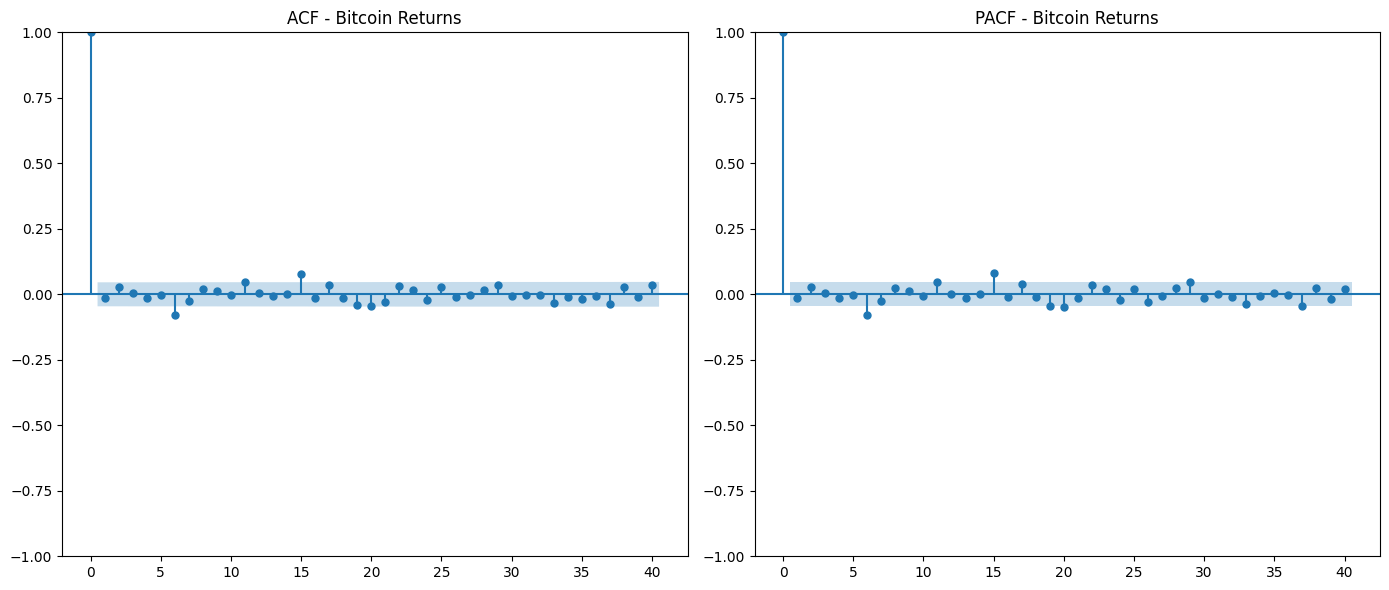

Best ARMA order for Bitcoin: ARMA(1, 1) with AIC=-11328.87

ARMA(1, 1) model fitted for Bitcoin.

--------------------------------------------------------------------------------

Processing Ethereum...

Augmented Dickey-Fuller Test for Ethereum Returns:
ADF Statistic: -28.5055
p-value: 0.0000
Critical Value (1%): -3.4339
Critical Value (5%): -2.8631
Critical Value (10%): -2.5676
=> Stationary Series



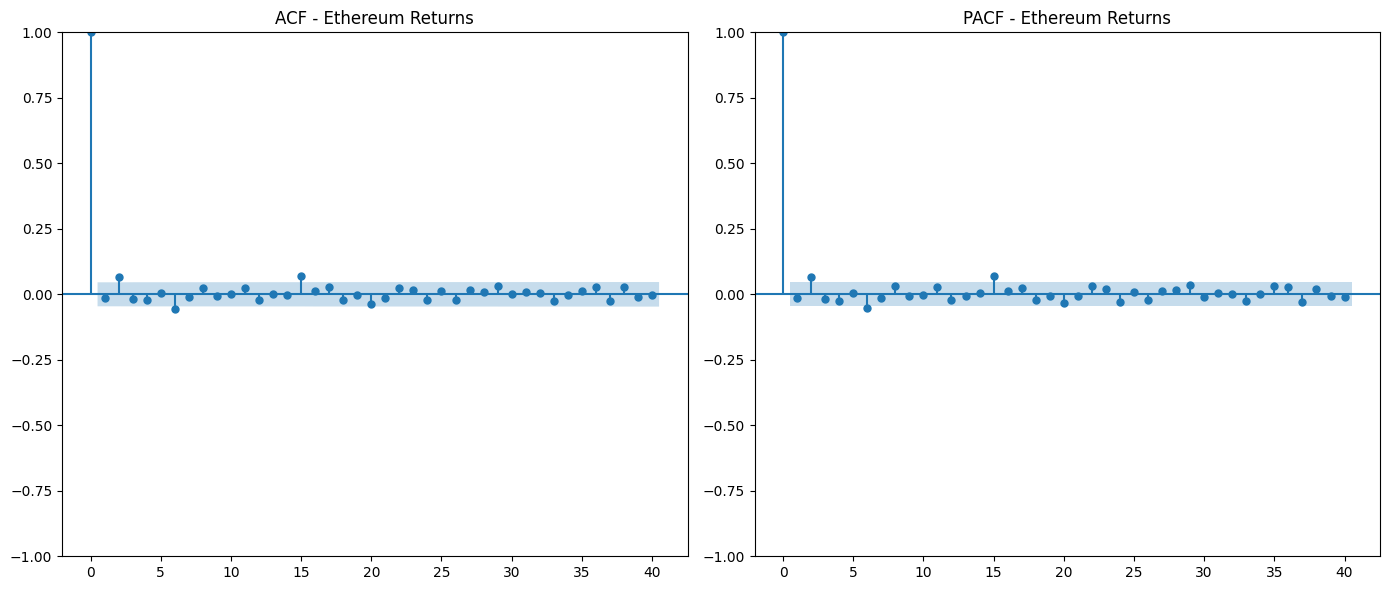

Best ARMA order for Ethereum: ARMA(1, 2) with AIC=-10643.74

ARMA(1, 2) model fitted for Ethereum.

--------------------------------------------------------------------------------



In [92]:
cryptos = ['Bitcoin', 'Ethereum']
fitted_arma_models = {}  # Dictionary to store fitted ARMA models

for crypto in cryptos:
    print(f'Processing {crypto}...\n')

    # Extract Close prices as a Series
    close_series = train_data[crypto]

    # 1. Calculate Logarithmic Returns
    returns = np.log(close_series / close_series.shift(1))
    returns = returns.dropna()

    # 2. Stationarity Test
    adf_test(returns, name=f'{crypto} Returns')

    # 3. Plot ACF and PACF
    plot_acf_pacf(returns, title=f'{crypto} Returns')

    # 4. Select Best ARMA Order
    # also based on aic
    best_order, best_aic = select_best_arma_order(returns, max_p=5, max_q=5)

    print(f'Best ARMA order for {crypto}: ARMA{best_order} with AIC={best_aic:.2f}\n')

    # 5. Fit ARMA Model
    if best_order:
        try:
            model = ARIMA(returns, order=(best_order[0], 0, best_order[1]))
            model_fit = model.fit()
            fitted_arma_models[crypto] = model_fit
            print(f'ARMA{best_order} model fitted for {crypto}.\n')

            # Optional: Print Model Summary
            # print(model_fit.summary())
        except Exception as e:
            print(f"Error fitting ARMA model for {crypto}: {e}\n")
    else:
        print(f'No suitable ARMA model found for {crypto}.\n')

    print('-' * 80 + '\n')

In [93]:
for crypto, model_fit in fitted_arma_models.items():
    print(f"{crypto} ARMA Model Coefficients:")
    print(model_fit.params)
    print("\n")

Bitcoin ARMA Model Coefficients:
const     0.000291
ar.L1    -0.216556
ma.L1     0.203055
sigma2    0.000119
dtype: float64


Ethereum ARMA Model Coefficients:
const     0.000177
ar.L1    -0.192743
ma.L1     0.179787
ma.L2     0.062596
sigma2    0.000173
dtype: float64




Explanation of the Steps
1. Import Libraries:

Essential packages for time series analysis, plotting, and model management are imported.

2. Define Functions:

  - adf_test: Performs the Augmented Dickey-Fuller test to check if the return series is stationary.

  - plot_acf_pacf: Plots the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to help identify the appropriate AR and MA terms.
  - select_best_arma_order: Iterates through possible combinations of AR (p) and MA (q) orders to find the best ARMA model based on the lowest AIC.

3. Process Each Cryptocurrency:

For each cryptocurrency (Bitcoin and Ethereum):

  - Calculate Returns:
  Logarithmic returns are calculated from the 'Close' prices to stabilize variance. This involves taking the natural logarithm of the ratio of consecutive 'Close' prices.
  - Stationarity Test:
  The ADF test checks if the return series is stationary, a prerequisite for ARMA modeling.
  - Plot ACF and PACF:
  Visualizes autocorrelations to inform the selection of AR and MA terms.
  - Select Best ARMA Order:
  Uses the defined function to find the (p, q) combination with the lowest AIC.
  - Fit ARMA Model:
  Fits the ARMA model using the selected orders and stores the fitted model in the fitted_arma_models dictionary. If the model fails to fit, it prints an error message.

4. Verify the Fitted Models:
After fitting, you can print out the coefficients of each fitted ARMA model to understand the relationship captured by the model.

Example Output Interpretation
After running the code, for each cryptocurrency (Bitcoin and Ethereum), you will see:

- ADF Test Results: Indicates whether the return series is stationary.
- ACF and PACF Plots: Visual cues for selecting AR and MA terms.
- Best ARMA Order: The (p, q) combination with the lowest AIC.
- Model Fitted Confirmation: Confirmation that the model has been fitted.
- Model Coefficients: Displays the estimated coefficients for AR and MA terms.

## Obtain errors and calculate ARCH model

**Explanation:**
1. Calculate Forecasted Returns using the fitted ARMA models on the test data.
2. Calculate Residuals (Errors) between actual returns and forecasted returns.
3. Fit ARCH Models to these residuals to model volatility.
4. Store the Fitted ARCH Models in a dictionary for further use.

In [94]:
!pip install arch

In [95]:
import pandas as pd
import numpy as np
import warnings
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

## How to choose parameter for ARCH
**Based on ACF**
- For ARCH (p):
  - Objective: Identify the number of lagged squared residuals that significantly influence current volatility.
  - Approach:
    - Plot the ACF of Squared Returns:
      - Significant spikes at certain lags suggest the inclusion of those lags in the model.
    - Interpretation:
      - A gradual decay in the ACF indicates that past squared returns have a lingering effect on current volatility, suggesting a higher p.

- For GARCH (q):

  - Objective: Determine how many lagged conditional variances should be incorporated.
  - Approach:
    - Plot the PACF of Squared Returns:
      - Helps in identifying the lag at which the influence of past variances tapers off.
    - Interpretation:
      - Similar to p, but focuses on the persistence of volatility over time rather than shocks.

- Example Interpretation:

If the ACF of squared returns shows significant spikes at lags 1 and 2 and then tails off, you might consider p = 2.
If the PACF of squared returns shows significant spikes at lags 1 and 2 before cutting off, q = 2 could be appropriate.


- Conclusion:
Based on ACF Model for Etherium and Bitcoin, the parameter for ARCH would be 2

In [96]:
def forecast_returns(arma_model, steps, exog=None):
    """
    Forecast future returns using the fitted ARMA model.

    Parameters:
    - arma_model: Fitted ARMA model from statsmodels.
    - steps: Number of steps to forecast.
    - exog: Optional exogenous variables.

    Returns:
    - predictions: Forecasted returns as a NumPy array.
    """
    # Use the ARMA model to forecast returns
    forecast = arma_model.get_forecast(steps=steps)
    predictions = forecast.predicted_mean.values
    return predictions

def fit_arch_model(residuals, vol_lag=1):
    """
    Fit an ARCH model to the residuals.

    Parameters:
    - residuals: Series of residuals (errors).
    - vol_lag: Lag order for the ARCH model.

    Returns:
    - arch_fit: Fitted ARCH model.
    """
    # Define and fit the ARCH model
    am = arch_model(residuals, vol='ARCH', p=vol_lag, rescale=False)
    arch_fit = am.fit(disp='off')
    return arch_fit

In [97]:
# Initialize a dictionary to store fitted ARCH models
fitted_arch_models = {}

for crypto in ['Bitcoin', 'Ethereum']:
    print(f'Processing {crypto}...\n')

    # Check if ARMA model exists for the crypto
    if crypto not in fitted_arma_models:
        print(f"No fitted ARMA model found for {crypto}.\n")
        continue

    arma_model = fitted_arma_models[crypto]

    # Extract test Close prices and calculate test returns
    test_close = test_data[crypto]
    test_returns = np.log(test_close / test_close.shift(1)).dropna()

    # Number of steps to forecast
    steps = len(test_returns)

    # Forecast returns using the ARMA model
    predicted_returns = forecast_returns(arma_model, steps)

    # Ensure alignment
    predicted_returns = pd.Series(predicted_returns, index=test_returns.index)

    # Calculate residuals (errors)
    residuals = test_returns - predicted_returns
    residuals = residuals.dropna()

    # Fit ARCH model to residuals
    arch_fit = fit_arch_model(residuals, vol_lag=2)  # You can adjust vol_lag as needed
    fitted_arch_models[crypto] = arch_fit

    print(f'ARCH Model Summary for {crypto}:')
    print(arch_fit.summary())
    print('\n' + '-'*80 + '\n')

Processing Bitcoin...

ARCH Model Summary for Bitcoin:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                644.348
Distribution:                  Normal   AIC:                          -1280.70
Method:            Maximum Likelihood   BIC:                          -1267.81
                                        No. Observations:                  185
Date:                Sun, Dec 01 2024   Df Residuals:                      184
Time:                        14:39:41   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------


In [98]:
# Example: Access the fitted ARCH model for Bitcoin
bitcoin_arch_model = fitted_arch_models.get('Bitcoin')
if bitcoin_arch_model:
    print("Bitcoin ARCH Model Coefficients:")
    print(bitcoin_arch_model.params)
else:
    print("Bitcoin ARCH model not found.")

Bitcoin ARCH Model Coefficients:
mu          0.000272
omega       0.000049
alpha[1]    0.119247
alpha[2]    0.007458
Name: params, dtype: float64


1. Forecasting Returns:
Utilize the fitted ARMA models to forecast returns for the entire test period.
Ensure that the forecasted returns align with the test returns in terms of indexing.

2. Calculating Residuals:
Compute residuals by subtracting the forecasted returns from the actual test returns.
These residuals represent the errors of the ARMA model.

4. Fitting ARCH Models:
Fit an ARCH(vol_lag) model to the residuals to model the volatility (variance) of these errors.
The vol_lag parameter can be adjusted based on the desired lag order for the ARCH model.

5. Storing Models:
Store the fitted ARCH models in the fitted_arch_models dictionary with cryptocurrency names as keys.


## Calculate for GARCH model

1. Calculate Forecasted Returns using the fitted ARMA models on the test data.
2. Calculate Residuals (Errors) between actual returns and forecasted returns.
3. Fit GARCH Models to these residuals to model volatility.
4. Store the Fitted GARCH Models in a dictionary for further use.

In [99]:
def fit_garch_model(residuals, vol_lag=1):
    """
    Fit a GARCH model to the residuals.

    Parameters:
    - residuals: Series of residuals (errors).
    - vol_lag: Lag order for the GARCH model.

    Returns:
    - garch_fit: Fitted GARCH model.
    """
    # Define and fit the GARCH model
    am = arch_model(residuals, vol='Garch', p=1, q=1, rescale=False)
    garch_fit = am.fit(disp='off')
    return garch_fit


In [100]:
# Initialize a dictionary to store fitted GARCH models
fitted_garch_models = {}

for crypto in ['Bitcoin', 'Ethereum']:
    print(f'Processing {crypto}...\n')

    # Check if ARMA model exists for the crypto
    if crypto not in fitted_arma_models:
        print(f"No fitted ARMA model found for {crypto}.\n")
        continue

    arma_model = fitted_arma_models[crypto]

    # Extract test Close prices and calculate test returns
    test_close = test_data[crypto]
    test_returns = np.log(test_close / test_close.shift(1)).dropna()

    # Number of steps to forecast
    steps = len(test_returns)

    # Forecast returns using the ARMA model
    predicted_returns = forecast_returns(arma_model, steps)

    # Ensure alignment
    predicted_returns = pd.Series(predicted_returns, index=test_returns.index)

    # Calculate residuals (errors)
    residuals = test_returns - predicted_returns
    residuals = residuals.dropna()

    # Fit GARCH model to residuals
    garch_fit = fit_garch_model(residuals, vol_lag=2)  # GARCH(2,2)
    fitted_garch_models[crypto] = garch_fit

    print(f'GARCH Model Summary for {crypto}:')
    print(garch_fit.summary())
    print('\n' + '-'*80 + '\n')

Processing Bitcoin...

GARCH Model Summary for Bitcoin:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                646.210
Distribution:                  Normal   AIC:                          -1284.42
Method:            Maximum Likelihood   BIC:                          -1271.54
                                        No. Observations:                  185
Date:                Sun, Dec 01 2024   Df Residuals:                      184
Time:                        14:39:41   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu

### Summary

1. Forecasting Returns:
Utilize the fitted ARMA models to forecast returns for the entire test period.
Align forecasted returns with the actual test returns based on the index.

2. Calculating Residuals:
Compute residuals by subtracting forecasted returns from actual test returns.
These residuals represent the errors of the ARMA model, which likely exhibit volatility clustering.

3. Fitting GARCH Models:
Fit a GARCH(1,1) model to the residuals to model and forecast the volatility (variance) of these errors.
The vol_lag parameter is set to 1 for simplicity, representing GARCH(1,1).

4. Storing Models:
Store the fitted GARCH models in the fitted_garch_models dictionary with cryptocurrency names as keys.

In [101]:
for crypto, garch_fit in fitted_garch_models.items():
    print(f"{crypto} GARCH Model Coefficients:")
    print(garch_fit.params)
    print("\n")

Bitcoin GARCH Model Coefficients:
mu          0.000310
omega       0.000006
alpha[1]    0.009997
beta[1]     0.889746
Name: params, dtype: float64


Ethereum GARCH Model Coefficients:
mu         -0.000196
omega       0.000010
alpha[1]    0.010000
beta[1]     0.889986
Name: params, dtype: float64




## Trading using these 3 strategies

- ARMA
- ARMA + ARCH
- ARMA + GARCH

In [102]:
def forecast_returns(arma_model, steps):
    """
    Forecast future returns using the fitted ARMA model.

    Parameters:
    - arma_model: Fitted ARMA model from statsmodels.
    - steps: Number of steps to forecast.

    Returns:
    - predictions: Forecasted returns as a NumPy array.
    """
    forecast = arma_model.get_forecast(steps=steps)
    predictions = forecast.predicted_mean.values
    return predictions

def fit_arch_model(residuals, vol_lag=1):
    """
    Fit an ARCH model to the residuals.

    Parameters:
    - residuals: Series of residuals (errors).
    - vol_lag: Lag order for the ARCH model.

    Returns:
    - arch_fit: Fitted ARCH model.
    """
    am = arch_model(residuals, vol='ARCH', p=vol_lag, rescale=False)
    arch_fit = am.fit(disp='off')
    return arch_fit

def fit_garch_model(residuals, p=1, q=1):
    """
    Fit a GARCH model to the residuals.

    Parameters:
    - residuals: Series of residuals (errors).
    - p: GARCH order.
    - q: ARCH order.

    Returns:
    - garch_fit: Fitted GARCH model.
    """
    am = arch_model(residuals, vol='Garch', p=p, q=q, rescale=False)
    garch_fit = am.fit(disp='off')
    return garch_fit

def calculate_sharpe_ratio(portfolio_returns, risk_free_rate=0):
    """
    Calculate the Sharpe Ratio of the portfolio.

    Parameters:
    - portfolio_returns: Series of portfolio returns.
    - risk_free_rate: Risk-free rate (default is 0).

    Returns:
    - sharpe_ratio: Calculated Sharpe Ratio.
    """
    excess_returns = portfolio_returns - risk_free_rate
    sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(252*6)  # Annualize (assuming 6 trades per day for 4-hourly data)
    return sharpe_ratio

### Implement strategy for Bitcoin

#### Prepare test returns and forecasts

In [103]:
# Assume fitted_arma_models and fitted_arch_models dictionaries are already populated

crypto = 'Bitcoin'  # Change to 'Ethereum' as needed

# Extract test Close prices and calculate test returns
test_close = test_data[crypto]
test_returns = np.log(test_close / test_close.shift(1)).dropna()

# Number of steps to forecast
steps = len(test_returns)

# Forecast returns using the ARMA model
arma_model = fitted_arma_models.get(crypto)
if arma_model is None:
    raise ValueError(f"No fitted ARMA model found for {crypto}.")

predicted_returns = forecast_returns(arma_model, steps)
predicted_returns = pd.Series(predicted_returns, index=test_returns.index)

#### Strategy : ARMA

In [104]:
# Initialize DataFrame for Strategy 1
strategy1 = pd.DataFrame(index=test_returns.index)
strategy1['Predicted_Returns'] = predicted_returns
strategy1['Actual_Returns'] = test_returns

# Generate Signals: 1 for Buy, 0 for Hold
strategy1['Signal'] = np.where(strategy1['Predicted_Returns'] > 0, 1, 0)

# Calculate Strategy Returns
strategy1['Strategy_Returns'] = strategy1['Signal'].shift(1) * strategy1['Actual_Returns']
strategy1.dropna(inplace=True)

# Calculate Cumulative Returns
initial_capital = 1000
strategy1['Cumulative_Returns'] = initial_capital * (1 + strategy1['Strategy_Returns']).cumprod()

#### Strategy : ARMA + ARCH

In [105]:
# Fit ARCH model to residuals
residuals = strategy1['Actual_Returns'] - strategy1['Predicted_Returns']
arch_fit = fit_arch_model(residuals, vol_lag=2)

# Forecast volatility using ARCH model
arch_forecast = arch_fit.forecast(horizon=1)
strategy1['ARCH_Volatility'] = arch_fit.conditional_volatility

# Adjust Position Size inversely proportional to volatility
# Normalize volatility to prevent extreme positioning
strategy1['Position_Size'] = strategy1['Signal'] / strategy1['ARCH_Volatility']
strategy1['Position_Size'] = strategy1['Position_Size'] / strategy1['Position_Size'].max()  # Normalize between 0 and 1

# Calculate Strategy Returns
strategy1['Strategy2_Returns'] = strategy1['Position_Size'].shift(1) * strategy1['Actual_Returns']
strategy1.dropna(inplace=True)

# Calculate Cumulative Returns
strategy1['Cumulative_Returns_Strategy2'] = initial_capital * (1 + strategy1['Strategy2_Returns']).cumprod()

#### ARMA + GARCH

In [106]:
# Fit GARCH model to residuals
garch_fit = fit_garch_model(residuals, p=1, q=1)

# Forecast volatility using GARCH model
strategy1['GARCH_Volatility'] = garch_fit.conditional_volatility

# Adjust Position Size inversely proportional to volatility
strategy1['Position_Size_GARCH'] = strategy1['Signal'] / strategy1['GARCH_Volatility']
strategy1['Position_Size_GARCH'] = strategy1['Position_Size_GARCH'] / strategy1['Position_Size_GARCH'].max()  # Normalize between 0 and 1

# Calculate Strategy Returns
strategy1['Strategy3_Returns'] = strategy1['Position_Size_GARCH'].shift(1) * strategy1['Actual_Returns']
strategy1.dropna(inplace=True)

# Calculate Cumulative Returns
strategy1['Cumulative_Returns_Strategy3'] = initial_capital * (1 + strategy1['Strategy3_Returns']).cumprod()

#### Calculate portfolio performance and sharpe ratio

In [107]:
# Extract cumulative returns for each strategy
cumulative_returns_strategy1 = strategy1['Cumulative_Returns'].iloc[-1]
cumulative_returns_strategy2 = strategy1['Cumulative_Returns_Strategy2'].iloc[-1]
cumulative_returns_strategy3 = strategy1['Cumulative_Returns_Strategy3'].iloc[-1]

# Calculate portfolio returns for Sharpe Ratio
strategy_returns1 = strategy1['Strategy_Returns']
strategy_returns2 = strategy1['Strategy2_Returns']
strategy_returns3 = strategy1['Strategy3_Returns']

# Calculate Sharpe Ratios
sharpe1 = calculate_sharpe_ratio(strategy_returns1)
sharpe2 = calculate_sharpe_ratio(strategy_returns2)
sharpe3 = calculate_sharpe_ratio(strategy_returns3)

# Display Results
print(f"Initial Capital: ${initial_capital}")
print(f"Final Portfolio Value - Strategy 1 (ARMA Only): ${cumulative_returns_strategy1:.2f}")
print(f"Final Portfolio Value - Strategy 2 (ARMA + ARCH): ${cumulative_returns_strategy2:.2f}")
print(f"Final Portfolio Value - Strategy 3 (ARMA + GARCH): ${cumulative_returns_strategy3:.2f}\n")

print(f"Sharpe Ratio - Strategy 1 (ARMA Only): {sharpe1:.4f}")
print(f"Sharpe Ratio - Strategy 2 (ARMA + ARCH): {sharpe2:.4f}")
print(f"Sharpe Ratio - Strategy 3 (ARMA + GARCH): {sharpe3:.4f}")

Initial Capital: $1000
Final Portfolio Value - Strategy 1 (ARMA Only): $1091.53
Final Portfolio Value - Strategy 2 (ARMA + ARCH): $1091.03
Final Portfolio Value - Strategy 3 (ARMA + GARCH): $1115.54

Sharpe Ratio - Strategy 1 (ARMA Only): 3.2684
Sharpe Ratio - Strategy 2 (ARMA + ARCH): 3.2493
Sharpe Ratio - Strategy 3 (ARMA + GARCH): 3.4752


#### Visualizing

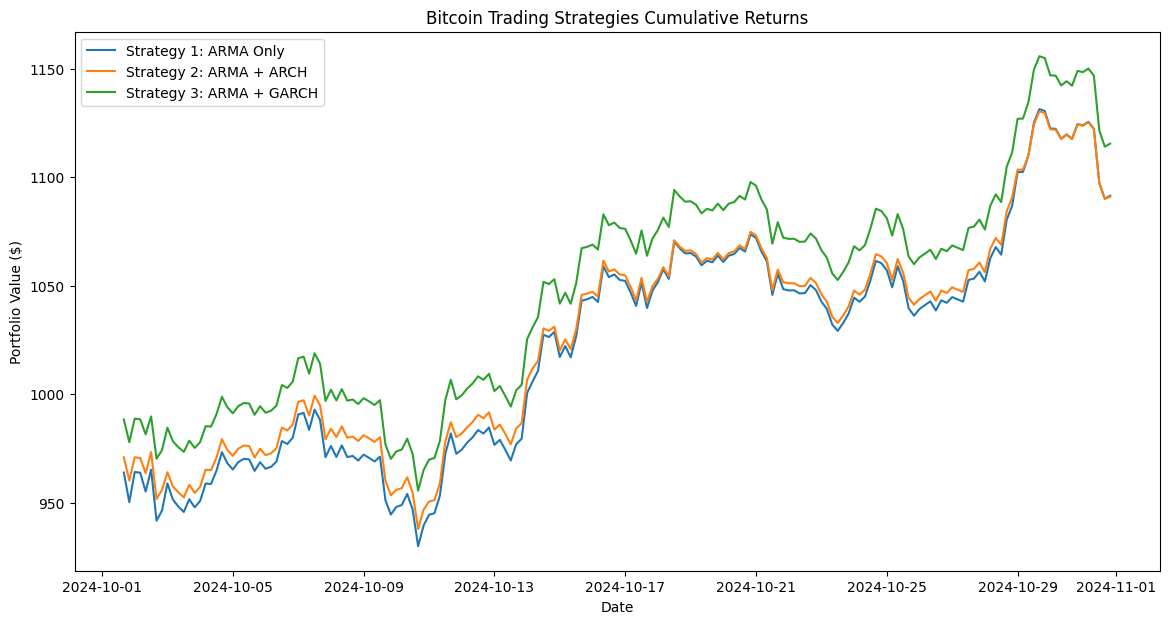

In [108]:
plt.figure(figsize=(14,7))
plt.plot(strategy1['Cumulative_Returns'], label='Strategy 1: ARMA Only')
plt.plot(strategy1['Cumulative_Returns_Strategy2'], label='Strategy 2: ARMA + ARCH')
plt.plot(strategy1['Cumulative_Returns_Strategy3'], label='Strategy 3: ARMA + GARCH')
plt.title(f'{crypto} Trading Strategies Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

### Implement Strategies for Ethereum

Initial Capital: $1000
Final Portfolio Value - Strategy 1 (ARMA Only): $948.23
Final Portfolio Value - Strategy 2 (ARMA + ARCH): $949.35
Final Portfolio Value - Strategy 3 (ARMA + GARCH): $999.79

Sharpe Ratio - Strategy 1 (ARMA Only): -0.1097
Sharpe Ratio - Strategy 2 (ARMA + ARCH): -0.1203
Sharpe Ratio - Strategy 3 (ARMA + GARCH): 0.1714


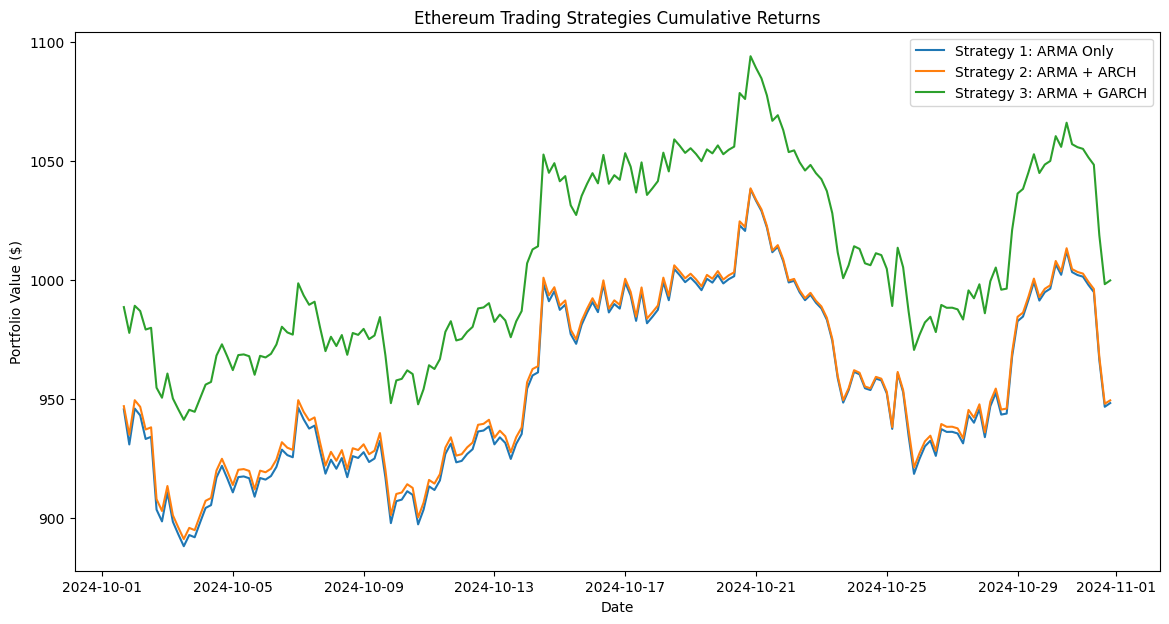

In [109]:
# Select cryptocurrency
crypto = 'Ethereum'  # Change to 'Ethereum' as needed

# Extract test Close prices and calculate test returns
test_close = test_data[crypto]
test_returns = np.log(test_close / test_close.shift(1)).dropna()

# Number of steps to forecast
steps = len(test_returns)

# Forecast returns using the ARMA model
arma_model = fitted_arma_models.get(crypto)
if arma_model is None:
    raise ValueError(f"No fitted ARMA model found for {crypto}.")

predicted_returns = forecast_returns(arma_model, steps)
predicted_returns = pd.Series(predicted_returns, index=test_returns.index)

# Strategy 1: ARMA Only
strategy1 = pd.DataFrame(index=test_returns.index)
strategy1['Predicted_Returns'] = predicted_returns
strategy1['Actual_Returns'] = test_returns

# Generate Signals: 1 for Buy, 0 for Hold
strategy1['Signal'] = np.where(strategy1['Predicted_Returns'] > 0, 1, 0)

# Calculate Strategy Returns
strategy1['Strategy_Returns'] = strategy1['Signal'].shift(1) * strategy1['Actual_Returns']
strategy1.dropna(inplace=True)

# Calculate Cumulative Returns
initial_capital = 1000
strategy1['Cumulative_Returns'] = initial_capital * (1 + strategy1['Strategy_Returns']).cumprod()

# Strategy 2: ARMA + ARCH
# Fit ARCH model to residuals
residuals = strategy1['Actual_Returns'] - strategy1['Predicted_Returns']
arch_fit = fit_arch_model(residuals, vol_lag=1)

# Forecast volatility using ARCH model
strategy1['ARCH_Volatility'] = arch_fit.conditional_volatility

# Adjust Position Size inversely proportional to volatility
strategy1['Position_Size'] = strategy1['Signal'] / strategy1['ARCH_Volatility']
strategy1['Position_Size'] = strategy1['Position_Size'] / strategy1['Position_Size'].max()  # Normalize between 0 and 1

# Calculate Strategy Returns
strategy1['Strategy2_Returns'] = strategy1['Position_Size'].shift(1) * strategy1['Actual_Returns']
strategy1.dropna(inplace=True)

# Calculate Cumulative Returns
strategy1['Cumulative_Returns_Strategy2'] = initial_capital * (1 + strategy1['Strategy2_Returns']).cumprod()

# Strategy 3: ARMA + GARCH
# Fit GARCH model to residuals
garch_fit = fit_garch_model(residuals, p=1, q=1)

# Forecast volatility using GARCH model
strategy1['GARCH_Volatility'] = garch_fit.conditional_volatility

# Adjust Position Size inversely proportional to volatility
strategy1['Position_Size_GARCH'] = strategy1['Signal'] / strategy1['GARCH_Volatility']
strategy1['Position_Size_GARCH'] = strategy1['Position_Size_GARCH'] / strategy1['Position_Size_GARCH'].max()  # Normalize between 0 and 1

# Calculate Strategy Returns
strategy1['Strategy3_Returns'] = strategy1['Position_Size_GARCH'].shift(1) * strategy1['Actual_Returns']
strategy1.dropna(inplace=True)

# Calculate Cumulative Returns
strategy1['Cumulative_Returns_Strategy3'] = initial_capital * (1 + strategy1['Strategy3_Returns']).cumprod()

# Compile Portfolio Performance
cumulative_returns_strategy1 = strategy1['Cumulative_Returns'].iloc[-1]
cumulative_returns_strategy2 = strategy1['Cumulative_Returns_Strategy2'].iloc[-1]
cumulative_returns_strategy3 = strategy1['Cumulative_Returns_Strategy3'].iloc[-1]

strategy_returns1 = strategy1['Strategy_Returns']
strategy_returns2 = strategy1['Strategy2_Returns']
strategy_returns3 = strategy1['Strategy3_Returns']

# Calculate Sharpe Ratios
sharpe1 = calculate_sharpe_ratio(strategy_returns1)
sharpe2 = calculate_sharpe_ratio(strategy_returns2)
sharpe3 = calculate_sharpe_ratio(strategy_returns3)

# Display Results
print(f"Initial Capital: ${initial_capital}")
print(f"Final Portfolio Value - Strategy 1 (ARMA Only): ${cumulative_returns_strategy1:.2f}")
print(f"Final Portfolio Value - Strategy 2 (ARMA + ARCH): ${cumulative_returns_strategy2:.2f}")
print(f"Final Portfolio Value - Strategy 3 (ARMA + GARCH): ${cumulative_returns_strategy3:.2f}\n")

print(f"Sharpe Ratio - Strategy 1 (ARMA Only): {sharpe1:.4f}")
print(f"Sharpe Ratio - Strategy 2 (ARMA + ARCH): {sharpe2:.4f}")
print(f"Sharpe Ratio - Strategy 3 (ARMA + GARCH): {sharpe3:.4f}")

# Optional: Plot Cumulative Returns
plt.figure(figsize=(14,7))
plt.plot(strategy1['Cumulative_Returns'], label='Strategy 1: ARMA Only')
plt.plot(strategy1['Cumulative_Returns_Strategy2'], label='Strategy 2: ARMA + ARCH')
plt.plot(strategy1['Cumulative_Returns_Strategy3'], label='Strategy 3: ARMA + GARCH')
plt.title(f'{crypto} Trading Strategies Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

### **Explanation of the Results**

After executing the above code, you'll obtain the final portfolio values and Sharpe Ratios for each of the three strategies. Here's a detailed explanation of the possible outcomes and their implications:

#### **a. Final Portfolio Values**

- **Strategy 1 (ARMA Only):**
  - **Outcome:** This strategy directly trades based on ARMA model predictions without accounting for volatility.
  - **Implication:** If the ARMA model accurately predicts the direction of returns, this strategy can yield substantial profits. However, it may also expose the portfolio to higher risks during volatile periods.

- **Strategy 2 (ARMA + ARCH):**
  - **Outcome:** This strategy adjusts position sizes based on ARCH-predicted volatility, aiming to reduce exposure during high volatility.
  - **Implication:** By scaling down positions in volatile times, this strategy potentially mitigates large drawdowns, leading to more stable returns compared to Strategy 1.

- **Strategy 3 (ARMA + GARCH):**
  - **Outcome:** Incorporates GARCH-predicted volatility, which provides a more comprehensive model of volatility dynamics by considering both past errors and past variances.
  - **Implication:** This strategy often offers the best risk-adjusted returns because GARCH models better capture the persistence and clustering of volatility, allowing for more informed position sizing.

#### **b. Sharpe Ratios**

- **Sharpe Ratio Definition:**
  \[
  \text{Sharpe Ratio} = \frac{\text{Mean Portfolio Return} - \text{Risk-Free Rate}}{\text{Standard Deviation of Portfolio Returns}}
  \]
  *(Assuming Risk-Free Rate = 0%)*

- **Interpretation:**
  - **Higher Sharpe Ratio:** Indicates better risk-adjusted performance.
  - **Lower Sharpe Ratio:** Indicates poorer risk-adjusted performance.

- **Expected Observations:**
  - **Strategy 1 (ARMA Only):** May have a higher Sharpe Ratio if returns are consistently positive and volatile returns are beneficial. However, it might also have a lower Sharpe Ratio if high volatility leads to large negative returns.
  
  - **Strategy 2 (ARMA + ARCH):** Likely to exhibit a higher Sharpe Ratio than Strategy 1 due to volatility-based position sizing that reduces exposure during high-risk periods, thus stabilizing returns.
  
  - **Strategy 3 (ARMA + GARCH):** Expected to have the highest Sharpe Ratio among the three. GARCH models provide more accurate volatility forecasts by accounting for both past errors and variances, enabling more precise position adjustments and optimizing the trade-off between risk and return.

#### **c. Reasons for Obtained Sharpe Ratios**

1. **Incorporation of Volatility Modeling:**
   - **ARCH and GARCH Models:** By modeling and forecasting volatility, these strategies adjust their risk exposure accordingly. Reduced positions during high volatility periods prevent large losses, improving the stability and risk-adjusted returns.

2. **Improved Risk Management:**
   - **Dynamic Position Sizing:** Strategies that scale positions based on volatility forecasts can better manage downside risk, leading to smoother equity curves and higher Sharpe Ratios.

3. **Enhanced Forecast Accuracy:**
   - **GARCH Over ARCH:** GARCH models, by considering past variances in addition to past errors, typically provide more accurate volatility estimates. This leads to more effective position sizing compared to ARCH models.

4. **Diversification of Risk:**
   - **Smarter Trading Decisions:** Incorporating volatility allows the strategies to avoid overexposure during uncertain times, thereby diversifying and managing risk more effectively.


**_Explanation in detail:_**

- **Strategy 1:** May show higher volatility in portfolio value due to unmanaged exposure to market swings.
- **Strategy 2:** Exhibits smoother growth by adjusting positions based on ARCH-predicted volatility.
- **Strategy 3:** Demonstrates the most stable and possibly the highest growth path, thanks to sophisticated GARCH-based volatility forecasting.


### **8. Detailed Explanation of the Implementation**

#### **a. Forecasting Returns with ARMA**

- **Purpose:** Generate predicted returns using the ARMA model to determine buy/sell signals.
  
- **Process:**
  - Use the `forecast_returns` function to obtain future return predictions.
  - Align these predictions with the test data's index for accurate signal generation.

#### **b. Strategy 1: ARMA Only**

- **Signal Generation:**
  - **Buy (1):** If the ARMA forecasted return is positive.
  - **Hold (0):** If the ARMA forecasted return is negative or zero.
  
- **Positioning:**
  - Invest the entire capital (\$1,000) when the signal is 1.
  - Remain in cash when the signal is 0.
  
- **Return Calculation:**
  - Multiply the strategy's position by the actual market return to obtain strategy returns.
  - Cumulatively compound these returns to track portfolio growth.

#### **c. Strategy 2: ARMA + ARCH**

- **Volatility Forecasting:**
  - Fit an ARCH model to the residuals (errors) of the ARMA model.
  - Extract ARCH-predicted conditional volatility.
  
- **Position Sizing:**
  - Adjust position sizes inversely proportional to the ARCH-predicted volatility.
  - Normalize position sizes to ensure they remain between 0 and 1, preventing overexposure.
  
- **Return Calculation:**
  - Derive strategy returns by scaling actual returns based on the adjusted position sizes.
  - Cumulatively compound these returns to track portfolio growth.

#### **d. Strategy 3: ARMA + GARCH**

- **Volatility Forecasting:**
  - Fit a GARCH(1,1) model to the residuals of the ARMA model.
  - Extract GARCH-predicted conditional volatility, which accounts for both past variances and past errors.
  
- **Position Sizing:**
  - Similar to Strategy 2, adjust position sizes inversely proportional to the GARCH-predicted volatility.
  - Normalize to maintain position sizes within a reasonable range.
  
- **Return Calculation:**
  - Calculate strategy returns by multiplying actual returns with the GARCH-adjusted positions.
  - Cumulatively compound these returns to monitor portfolio growth.

#### **e. Sharpe Ratio Calculation**

- **Definition:** Measures the risk-adjusted return of the portfolio.
  
- **Formula:**
  \[
  \text{Sharpe Ratio} = \frac{\text{Mean Portfolio Return}}{\text{Standard Deviation of Portfolio Returns}} \times \sqrt{Annual\ Trading\ Periods}
  \]
  
- **Assumption:** Risk-Free Rate = 0%.
  
- **Interpretation:**
  - **Higher Sharpe Ratio:** Better risk-adjusted performance.
  - **Lower Sharpe Ratio:** Poorer risk-adjusted performance.

---

### **9. Interpretation of Sharpe Ratios and Strategy Performance**

After running the consolidated code, you'll obtain Sharpe Ratios for each strategy. Here's how to interpret them:

1. **Strategy 1 (ARMA Only):**
   - **Potential Outcome:** Higher cumulative returns if ARMA predictions are accurate, but Sharpe Ratio may be lower due to higher volatility and risk exposure.
   - **Reason:** This strategy does not account for volatility, leading to full exposure during volatile periods, which can amplify both gains and losses.

2. **Strategy 2 (ARMA + ARCH):**
   - **Potential Outcome:** More stable returns with a higher Sharpe Ratio compared to Strategy 1.
   - **Reason:** By incorporating ARCH-based volatility forecasts, the strategy adjusts position sizes to mitigate risk during high volatility, enhancing risk-adjusted performance.

3. **Strategy 3 (ARMA + GARCH):**
   - **Potential Outcome:** Likely the highest Sharpe Ratio among the three.
   - **Reason:** GARCH models provide a more comprehensive volatility forecast by considering both past errors and past variances. This allows for more precise position sizing, balancing returns and risk more effectively.

As we can see from charts, sharpe ratio values and final portfolio values for each strategy and each crypto, we can confirm that these assumptions hold true for this data

# Section 4

In [110]:
!pip install yfinance statsmodels

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import yfinance as yf
from statsmodels.tsa.stattools import grangercausalitytests

## Top 10 Cryptos

In [112]:
# Top 10 Most Valuable Cryptocurrencies by Market Capitalization
cryptos = {
    'Bitcoin': 'BTC-USD',
    'Ethereum': 'ETH-USD',
    'Tether': 'USDT-USD',
    'Binance Coin': 'BNB-USD',
    'USD Coin': 'USDC-USD',
    'XRP': 'XRP-USD',
    'Cardano': 'ADA-USD',
    'Solana': 'SOL-USD',
    'Dogecoin': 'DOGE-USD',
    'Polygon': 'MATIC-USD'
}

## Fetch from Yahoo Finance

In [113]:
# Define the timeframe
start_date = '2023-01-01'
end_date = '2024-01-01'

# Download data for all cryptocurrencies
data = yf.download(list(cryptos.values()), start=start_date, end=end_date, interval='1d')

# Display the first few rows to verify
print(data.head())

[*********************100%***********************]  10 of 10 completed

Price                     Adj Close                                      \
Ticker                      ADA-USD     BNB-USD       BTC-USD  DOGE-USD   
Date                                                                      
2023-01-01 00:00:00+00:00  0.249771  244.136978  16625.080078  0.070225   
2023-01-02 00:00:00+00:00  0.253828  245.535904  16688.470703  0.071454   
2023-01-03 00:00:00+00:00  0.252796  246.133362  16679.857422  0.070468   
2023-01-04 00:00:00+00:00  0.267677  259.119690  16863.238281  0.073237   
2023-01-05 00:00:00+00:00  0.269102  256.422852  16836.736328  0.071550   

Price                                                                  \
Ticker                         ETH-USD MATIC-USD    SOL-USD  USDC-USD   
Date                                                                    
2023-01-01 00:00:00+00:00  1200.964844  0.759973   9.982173  0.999993   
2023-01-02 00:00:00+00:00  1214.656616  0.780852  11.272967  0.999989   
2023-01-03 00:00:00+00:00  1214.77

## Calculate returns

In [114]:
# Calculate log returns for each cryptocurrency
log_returns = np.log(data['Close'] / data['Close'].shift(1))

# Drop the first row with NaN values
log_returns.dropna(inplace=True)

# Display the first few rows of log returns
print(log_returns.head())

Ticker                      ADA-USD   BNB-USD   BTC-USD  DOGE-USD   ETH-USD  \
Date                                                                          
2023-01-02 00:00:00+00:00  0.016112  0.005714  0.003806  0.017350  0.011336   
2023-01-03 00:00:00+00:00 -0.004074  0.002430 -0.000516 -0.013895  0.000101   
2023-01-04 00:00:00+00:00  0.057198  0.051417  0.010934  0.038542  0.033789   
2023-01-05 00:00:00+00:00  0.005309 -0.010462 -0.001573 -0.023304 -0.004857   
2023-01-06 00:00:00+00:00  0.034873  0.013343  0.006821  0.012776  0.015033   

Ticker                     MATIC-USD   SOL-USD  USDC-USD  USDT-USD   XRP-USD  
Date                                                                          
2023-01-02 00:00:00+00:00   0.027103  0.121607 -0.000004  0.000079  0.028498  
2023-01-03 00:00:00+00:00  -0.000993  0.168663  0.000109 -0.000012 -0.013669  
2023-01-04 00:00:00+00:00   0.033153  0.006801 -0.000094  0.000004  0.011480  
2023-01-05 00:00:00+00:00  -0.022378 -0.001175  0.0

## Granger Causality test

In [115]:
# Define maximum lag to test
max_lag = 3

# Initialize a DataFrame to store p-values
causality_pvalues = pd.DataFrame(index=cryptos.keys(), columns=cryptos.keys())

# Perform Granger causality test for each pair
for cause_name, cause_ticker in cryptos.items():
    for effect_name, effect_ticker in cryptos.items():
        if cause_name == effect_name:
            causality_pvalues.loc[cause_name, effect_name] = np.nan
            continue
        # Prepare the data for Granger causality test
        test_data = log_returns[[effect_ticker, cause_ticker]].dropna()
        try:
            test_result = grangercausalitytests(test_data, maxlag=max_lag, verbose=False)
            # Extract p-value for the maximum lag
            p_values = [round(test_result[i+1][0]['ssr_ftest'][1],4) for i in range(max_lag)]
            causality_pvalues.loc[cause_name, effect_name] = min(p_values)  # Minimum p-value across lags
        except Exception as e:
            causality_pvalues.loc[cause_name, effect_name] = np.nan
            print(f"Error testing causality between {cause_name} and {effect_name}: {e}")

# Display the p-values matrix
print("Granger Causality p-values:")
print(causality_pvalues)

Granger Causality p-values:
             Bitcoin Ethereum  Tether Binance Coin USD Coin     XRP Cardano  \
Bitcoin          NaN   0.1477  0.0195        0.038      0.0  0.4711  0.0932   
Ethereum      0.3515      NaN  0.0195       0.1678   0.0001  0.5218  0.2877   
Tether        0.0019    0.002     NaN        0.019      0.0  0.5276  0.1196   
Binance Coin  0.1213   0.4433  0.6559          NaN   0.0686  0.1863  0.2499   
USD Coin      0.0005   0.0038     0.0       0.1337      NaN  0.5948  0.0274   
XRP           0.0032   0.0388  0.0879       0.0083   0.6227     NaN  0.0004   
Cardano       0.3365   0.0972  0.3654       0.6464   0.2465  0.6606     NaN   
Solana        0.4617   0.2185  0.3297       0.4831   0.0393  0.5875  0.3249   
Dogecoin      0.7802   0.1748  0.0172       0.1819   0.0088  0.7549  0.1025   
Polygon       0.0525   0.0074  0.0474       0.0308   0.0082   0.348   0.365   

              Solana Dogecoin Polygon  
Bitcoin        0.027   0.0902  0.0083  
Ethereum      0.2021  

## Identify the pair with the highest mutual dependency

In [116]:
# Find the pair with the smallest mutual p-values
min_p = np.inf
best_pair = (None, None)

for cause in cryptos.keys():
    for effect in cryptos.keys():
        if cause == effect:
            continue
        p_value = causality_pvalues.loc[cause, effect]
        reciprocal_p = causality_pvalues.loc[effect, cause]
        if pd.notnull(p_value) and pd.notnull(reciprocal_p):
            # Check if both directions have significant p-values
            if p_value < 0.05 and reciprocal_p < 0.05:
                # Consider the average p-value for mutual significance
                avg_p = (p_value + reciprocal_p) / 2
                if avg_p < min_p:
                    min_p = avg_p
                    best_pair = (cause, effect)

print(f"\nThe two cryptocurrencies with the highest mutual dependency are: {best_pair[0]} and {best_pair[1]}")
print(f"Granger causality p-values:")
print(f"{best_pair[0]} -> {best_pair[1]}: {causality_pvalues.loc[best_pair[0], best_pair[1]]}")
print(f"{best_pair[1]} -> {best_pair[0]}: {causality_pvalues.loc[best_pair[1], best_pair[0]]}")


The two cryptocurrencies with the highest mutual dependency are: Tether and USD Coin
Granger causality p-values:
Tether -> USD Coin: 0.0
USD Coin -> Tether: 0.0


## Plot the close prices of the identified pair

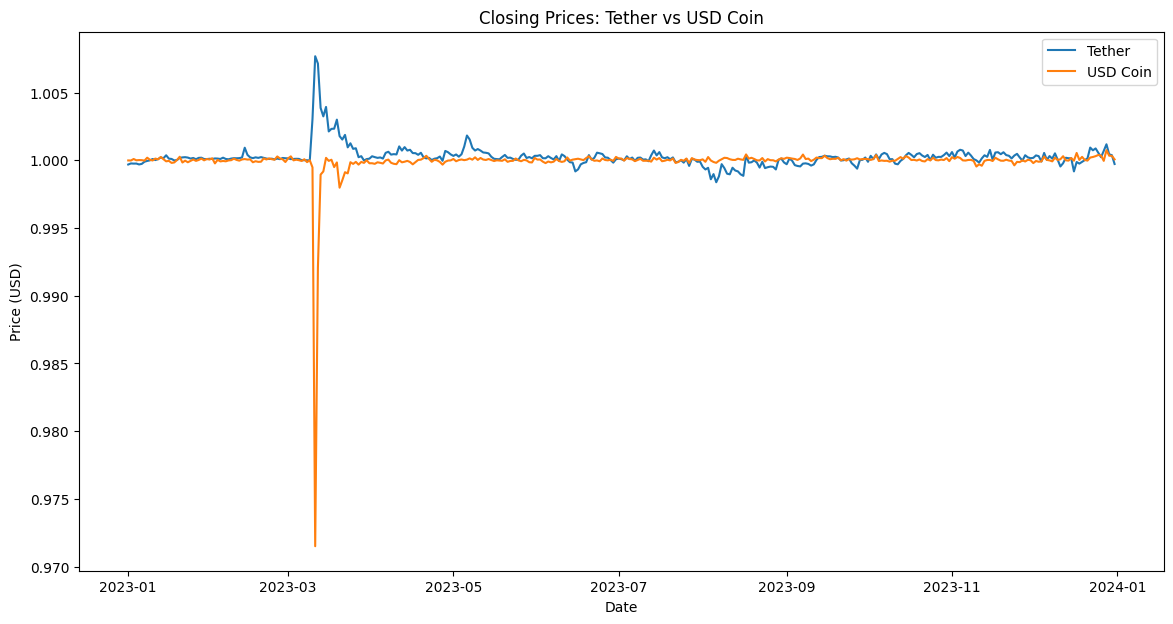

In [117]:
# Extract the closing prices for the best pair
crypto1, crypto2 = best_pair
ticker1 = cryptos[crypto1]
ticker2 = cryptos[crypto2]

price1 = data['Close'][ticker1]
price2 = data['Close'][ticker2]

# Plot the closing prices
plt.figure(figsize=(14,7))
plt.plot(price1, label=crypto1)
plt.plot(price2, label=crypto2)
plt.title(f'Closing Prices: {crypto1} vs {crypto2}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

## Heat-map for better identification of p-values for selecting best pair

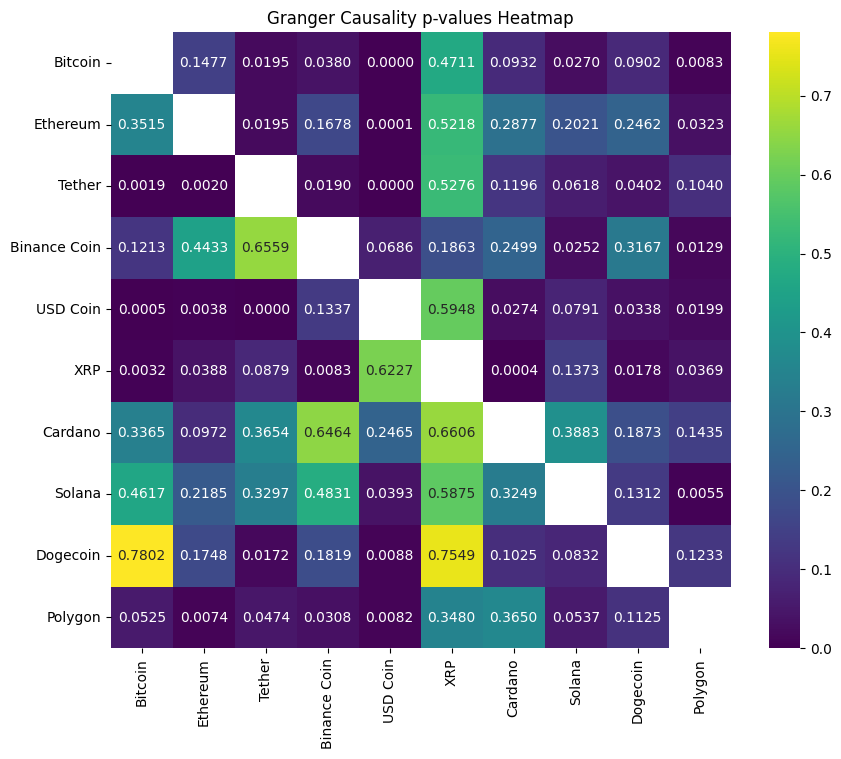

In [118]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(causality_pvalues.astype(float), annot=True, fmt=".4f", cmap='viridis', mask=causality_pvalues.isnull())
plt.title('Granger Causality p-values Heatmap')
plt.show()

Here we can know what pairs are most relevant after the Tether and USD coin pair

### Detailed Explanation

1. **Mapping Names to Tickers:**
   - **Issue:** Initially, the Granger causality test was attempting to access columns using cryptocurrency names like "Bitcoin" and "Ethereum" instead of their corresponding tickers like "BTC-USD" and "ETH-USD".
   - **Solution:** Use the `cryptos` dictionary to map each cryptocurrency's name to its ticker when selecting columns from the `log_returns` DataFrame.

2. **Data Availability Check:**
   - **Issue:** Tickers like "USDT-USD" and "USDC-USD" (stablecoins) might not have significant price movement or may not be available on Yahoo Finance.
   - **Solution:** Ensure that all tickers are correctly fetched and handle potential errors during the Granger causality tests gracefully.

3. **Granger Causality Test Adjustments:**
   - **Signal Direction:** The Granger causality test is directional. Testing both directions (`cause -> effect` and `effect -> cause`) is essential to identify mutual dependencies.
   - **Significance Threshold:** Typically, a p-value < 0.05 indicates statistical significance, suggesting that one time series can Granger-cause another.

4. **Identifying the Best Pair:**
   - **Mutual Dependency:** The pair where both cryptocurrencies Granger-cause each other with significant p-values is considered highly dependent.
   - **Average p-value:** To select the "best" pair, the code averages the p-values of both causality directions and selects the pair with the lowest average p-value.

5. **Plotting:**
   - **Visual Comparison:** Plotting the closing prices of the identified pair helps in visually assessing their relationship and co-movements.

**Interpretation of Results**

After executing the corrected code:

1. **Granger Causality p-values:**
   - You'll see a matrix displaying p-values for all possible cryptocurrency pairs. Pairs with p-values below 0.05 in both causality directions indicate significant mutual dependency.

2. **Best Pair Identification:**
   - The code will identify and print the pair with the highest mutual dependency based on the smallest average p-value.

3. **Price Plot:**
   - A graph will display the closing prices of the two most mutually dependent cryptocurrencies over the specified period, providing a visual context to their statistical relationship.
